<a href="https://colab.research.google.com/github/ko-syo-noyome/tensol-lesson1/blob/main/kiso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gradio -q


In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import gradio as gr

print(tf.__version__)


2.8.2


In [5]:
tf.get_logger().setLevel('ERROR')

In [6]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
x_train,x_test=x_train/255.0,x_test/255.0

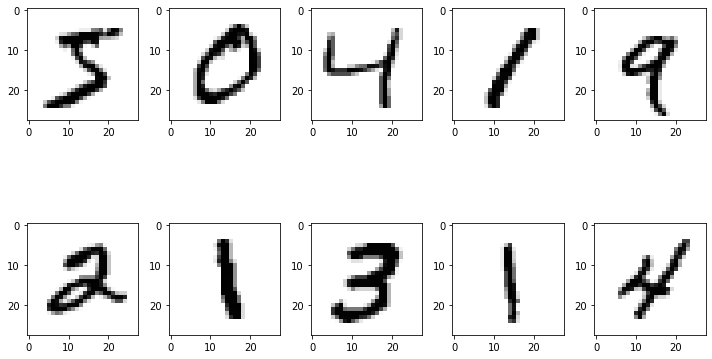

In [8]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=2,ncols=5,figsize=(10,10),tight_layout=True)


n=0
for i in range(2):
  for j in range(5):
    ax[i][j].imshow(x_train[n],cmap=plt.cm.binary)
    n+=1


In [11]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10,'softmax')                               
  

])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2594 - accuracy: 0.9270
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1168 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0795 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0461 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0364 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0289 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0245 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0193 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.015

In [16]:
_,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0851 - accuracy: 0.9782 - 554ms/epoch - 2ms/step
0.9782000184059143


In [18]:
predictions=model.predict(x_test)

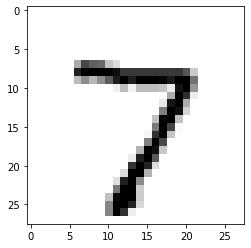

In [19]:
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [20]:
import numpy as np

np.argmax(predictions[0])

7